# Analysis of the DOE ACE-ENA Campaign

## 1. Background
https://www.arm.gov/research/campaigns/aaf2017ace-ena

**AEROSOL AND CLOUD EXPERIMENTS IN THE EASTERN NORTH ATLANTIC (ACE-ENA)**

1 JUNE 2017 - 28 FEBRUARY 2018

LEAD SCIENTIST: JIAN WANG


With their extensive coverage, low clouds greatly influence global climate, but they are poorly represented in global climate models (GCMs). The response of low clouds to changes in atmospheric greenhouse gases and aerosols remains the major source of uncertainty in climate simulations. The poor representations of low clouds in GCMs are partly due to inadequate observations of their microphysical and macrophysical structures, radiative effects, and the associated aerosol distribution and budget in regions where the aerosol impact is the greatest.

The Eastern North Atlantic (ENA) is a region with persistent but diverse subtropical marine boundary layer (MBL) clouds. Their albedo and precipitation are highly susceptible to perturbations in aerosol properties. Boundary layer aerosol in the ENA region is influenced by a variety of sources, leading to strong variations in cloud condensation nuclei (CCN) concentration and aerosol optical properties.

The ARM Climate Research Facility has a fixed ENA atmospheric observatory on Graciosa Island in the Azores, providing invaluable information on MBL aerosols and low clouds. At the same time, the vertical structures and horizontal variabilities of aerosols, trace gases, clouds, drizzle, and atmospheric thermodynamics are critically needed for understanding and quantifying the budget of MBL aerosols, the radiative properties, precipitation efficiency, and life cycle of MBL clouds, and the cloud response to aerosol perturbations. Much of this data can be obtained only through aircraft-based measurements. In addition, the interconnected aerosol and cloud processes are best investigated by a study involving simultaneous in situ aerosol, cloud, and thermodynamic measurements. In situ measurements are also necessary for validating and improving ground-based retrieval algorithms at the ENA observatory.

The Aerosol and Cloud Experiments in the Eastern North Atlantic (ACE-ENA) field campaign was motivated by the need for comprehensive in situ characterizations of boundary layer structure, and associated vertical distributions and horizontal variabilities of low clouds and aerosols over the Azores. The ARM Aerial Facility (AAF) Gulfstream-159 (G-1) research aircraft flew from Terceira Island in the Azores during two intensive operational periods: early summer 2017 (June to July) and winter 2018 (January to February). Deployments during both seasons allowed for examination of key aerosol and cloud processes under a variety of representative meteorological and cloud conditions.

The science themes for ACE-ENA included:

the budget of MBL CCN and its seasonal variation
effects of aerosols on clouds and precipitation
cloud microphysical and macrophysical structures, and entrainment mixing
advancing retrievals of turbulence, clouds, and drizzle
model evaluation and process studies.
A key advantage of the deployments is the strong synergy between the measurements aboard the G-1 and the routine measurements at the ENA observatory, including state-of-the-art profiling and scanning radars. The three-dimensional cloud structures provided by the scanning radars will put the detailed in situ measurements into mesoscale and cloud life cycle contexts. On the other hand, high-quality in situ measurements will enable validation and improvements of ground-based retrieval algorithms at the ENA observatory, leading to high-quality and statistically robust data sets from the routine measurements.

The deployments, combined with the routine measurements at the ENA site, will have a long-lasting impact on the research and modeling of low clouds and aerosols in the remote marine environment.

**Link to science plan https://www.arm.gov/publications/programdocs/doe-sc-arm-16-006.pdf**

## 2. Analysis of Research Flight Tracks
**An overview analysis of the track of each research flight.** <br> Airplane location and speed information are from the Aircraft-Integrated Meteorological Measurement System (AIMMS-20) 20-hz Dataset. <b> 

Horizontal flight tracks are overlaid on GOES satellite image (visible band reflectance) from the NASA Langley " Satellite ClOud and Radiation Property retrieval System"(SatCORPS) group (https://cloudsgate2.larc.nasa.gov//cgi-bin/site/showdoc?docid=22&lkdomain=Y&domain=amf_azores_dev). <b>
    
Vertical flight tracks are overlaid on ARM Active Remote Sensing of Clouds (ARSCL) radar reflectivity curtain and CEIL cloud base height. Shaded regions are the **horizontal** in-cloud flight leg 

### 2.1 Routines to plot the horizontal and vertical flight tracks 

In [1]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import os, datetime, fnmatch,re, glob
from NotebookFinder import *
sys.meta_path.append(NotebookFinder())
import importlib
import ACEENA_flighttrack_analysis
import ACEENA_Read_RF_data
import ACEENA_hleg_microphysics
import ACEENA_vleg_microphysics
from metpy.units import units
import metpy.calc as mpcalc
import pickle

importing Jupyter notebook from ACEENA_flighttrack_analysis.ipynb
importing Jupyter notebook from ACEENA_Read_RF_data.ipynb
importing Jupyter notebook from ACEENA_AIMMS.ipynb
importing Jupyter notebook from ACEENA_ARSCL.ipynb
importing Jupyter notebook from ACEENA_CEIL.ipynb
importing Jupyter notebook from ACEENA_FCDP.ipynb
importing Jupyter notebook from ACEENA_TDS.ipynb
importing Jupyter notebook from ACEENA_HOLODEC.ipynb
importing Jupyter notebook from ACEENA_VISST.ipynb
importing Jupyter notebook from ACEENA_Utility.ipynb
importing Jupyter notebook from ACEENA_TDL.ipynb
importing Jupyter notebook from ACEENA_LWCair.ipynb
importing Jupyter notebook from ACEENA_mergedPSD.ipynb
importing Jupyter notebook from ACEENA_AAFCCN.ipynb
importing Jupyter notebook from ACEENA_hleg_microphysics.ipynb
importing Jupyter notebook from ACEENA_vleg_microphysics.ipynb


In [2]:
def ACEENA_analysis(IOP_stamp,RF_stamp,hleg_dw_i_threshold,
                    save_data=False):
    print('-------------------------------------------------------------------')
    #ACEENA_flighttrack_analysis.Flight_Track_Analysis(IOP_stamp,RF_stamp)
    # set up the path to store the figure output
    print(IOP_stamp,RF_stamp)
    save_path = "./"+IOP_stamp+"-"+RF_stamp+"/"
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    # set up the path to store the figure output
    save_path = "./"+IOP_stamp+"-"+RF_stamp+"/"
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    # read in measurements from in situ, ground- and satellite-based observation
    RF_AIMMS, RF_FCDP, RF_TDS, RF_ARSCL, RF_CEIL, RF_VISST,RF_TDL,RF_LWCair,RF_mPSD,RF_holodec,RF_AAFCCN,RF_AOSCCN = \
                        ACEENA_Read_RF_data.Read_RF_data(IOP_stamp, RF_stamp,hleg_dw_i_threshold)

    # plot the flight track on satellite image
    #ACEENA_flighttrack_analysis.plot_flight_track_on_satellite_img(RF_AIMMS, RF_VISST, save_path)
    ACEENA_flighttrack_analysis.simple_flight_track_plot(RF_AIMMS,  RF_VISST, save_path)

    # plot radar curtain with flight track altitude
    ACEENA_flighttrack_analysis.plot_radar_curtain(RF_ARSCL,RF_CEIL,RF_AIMMS,RF_FCDP, RF_TDL,\
                                                    figure_path=save_path)
    RF_hlegs = ACEENA_hleg_microphysics.hleg(RF_AIMMS, RF_FCDP, RF_TDS,RF_LWCair, RF_mPSD, RF_holodec ,\
                                             figure_path=save_path,verbose=False)
    RF_vlegs = ACEENA_vleg_microphysics.vleg(RF_AIMMS, RF_FCDP, RF_LWCair,RF_TDL,figure_path=save_path,verbose=True)
    
    
    if save_data:
        save_dict ={'RF_AIMMS.pkl':  RF_AIMMS,\
                    'RF_FCDP.pkl':   RF_FCDP,\
                    'RF_TDS.pkl':    RF_TDS,\
                    'RF_CEIL.pkl':   RF_CEIL,\
                    'RF_TDL.pkl':    RF_TDL,\
                    'RF_LWCair.pkl': RF_LWCair,\
                    'RF_mPSD.pkl':   RF_mPSD,\
                    'RF_holodec.pkl':RF_holodec,\
                    'RF_AAFCCN.pkl': RF_AAFCCN,\
                    'RF_AOSCCN.pkl': RF_AOSCCN,\
                    'RF_hlegs.pkl':  RF_hlegs,\
                    'RF_vlegs.pkl':  RF_vlegs}
        
        for i in range(len(list(save_dict.items()))):
            filename,object2save=list(save_dict.items())[i]
            pkl_savefile = open(save_path+filename, 'wb')
            pickle.dump(object2save, pkl_savefile, pickle.HIGHEST_PROTOCOL)
            pkl_savefile.close()
        
    return RF_AIMMS, RF_FCDP, RF_TDS, RF_ARSCL, RF_CEIL, RF_VISST, RF_TDL,\
           RF_LWCair,RF_mPSD,RF_holodec,RF_AAFCCN,RF_AOSCCN, RF_hlegs,RF_vlegs


In [3]:
#RF_cases = ['20170706082313', '20170718083145', '20170720083203', '20180119121131', 
#             '20180124125356', '20180125110145', '20180209110431', '20180211112034', 
#             '20180215125953']
RF_cases = ['20170718083145']
run_name = 'all_drizzle_RFs'
hleg_dw_i_threshold=2.0*units('m/s')

for RF_stamp in RF_cases:
    if RF_stamp[0:4] == '2017':
        IOP_stamp='IOP1'
    else:
        IOP_stamp='IOP2'    
    RF_AIMMS, RF_FCDP, RF_TDS, RF_ARSCL, RF_CEIL, RF_VISST,\
    RF_TDL,RF_LWCair,RF_mPSD,RF_holodec,RF_AAFCCN,RF_AOSCCN,RF_hlegs,RF_vlegs = ACEENA_analysis(IOP_stamp,RF_stamp,hleg_dw_i_threshold,save_data=True)
           

-------------------------------------------------------------------
IOP1 20170718083145
reading AIMMS data
find_horizontal_legs in AIMMS data
8 55.690209878858845 kilometer
16 18.82201725287188 kilometer
24 10.014448476537737 kilometer
36 28.9143534222717 kilometer
65 27.74356682610522 kilometer
73 42.89118986483175 kilometer
88 43.680873444549654 kilometer
96 45.13886193540678 kilometer
103 47.27258535291568 kilometer
166 40.85998047425569 kilometer
180 43.99831479512139 kilometer
191 44.9898400170327 kilometer
204 40.44907961677444 kilometer
210 78.93913690630544 kilometer
hleg_Alt_mean [2477.04169954237 156.80888404744613 167.27735849056603 163.31071809727092 523.180012761206 719.6185600258002 873.896614030953 966.6297374930184 1088.9115401239014 2510.337233424612 773.3232465399954 926.8344029903378 1057.7704156268824 1625.076089186786] meter
combine_hleg_with_similar_height True
before combine [2477.04169954237 156.80888404744613 167.27735849056603 163.31071809727092 523.1800127612

ACEENA_flighttrack_analysis.ipynb:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  {


VISST lon range -32.99945 -23.00003
VISST lat range 33.00006 42.999886
AIMMS lon range -28.35116 degree -26.84091 degree
AIMMS lat range 38.59885 degree 39.37802 degree
plotting radar curtain
plotting cloud bounary from ground sensor
plotting flight height
finishing plotting flight height


ACEENA_Utility.ipynb:7: RuntimeWarning: divide by zero encountered in power
  "# ACE-ENA Utilities\n",
ACEENA_Utility.ipynb:7: RuntimeWarning: invalid value encountered in multiply
  "# ACE-ENA Utilities\n",
ACEENA_hleg_microphysics.ipynb:106: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  "            qc_mean,qc_std,fqc, nc_mean,nc_std, fnc,\\\n",


./IOP1-20170718083145/hleg_05_PSD_spectrum.png


ACEENA_hleg_microphysics.ipynb:106: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  "            qc_mean,qc_std,fqc, nc_mean,nc_std, fnc,\\\n",


./IOP1-20170718083145/hleg_06_PSD_spectrum.png


ACEENA_hleg_microphysics.ipynb:106: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  "            qc_mean,qc_std,fqc, nc_mean,nc_std, fnc,\\\n",


./IOP1-20170718083145/hleg_07_PSD_spectrum.png


ACEENA_Utility.ipynb:7: RuntimeWarning: divide by zero encountered in power
  "# ACE-ENA Utilities\n",
ACEENA_Utility.ipynb:7: RuntimeWarning: invalid value encountered in multiply
  "# ACE-ENA Utilities\n",
ACEENA_hleg_microphysics.ipynb:106: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  "            qc_mean,qc_std,fqc, nc_mean,nc_std, fnc,\\\n",


./IOP1-20170718083145/hleg_08_PSD_spectrum.png


ACEENA_Utility.ipynb:7: RuntimeWarning: divide by zero encountered in power
  "# ACE-ENA Utilities\n",
ACEENA_Utility.ipynb:7: RuntimeWarning: invalid value encountered in multiply
  "# ACE-ENA Utilities\n",
ACEENA_hleg_microphysics.ipynb:106: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  "            qc_mean,qc_std,fqc, nc_mean,nc_std, fnc,\\\n",


./IOP1-20170718083145/hleg_10_PSD_spectrum.png


ACEENA_hleg_microphysics.ipynb:106: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  "            qc_mean,qc_std,fqc, nc_mean,nc_std, fnc,\\\n",


./IOP1-20170718083145/hleg_11_PSD_spectrum.png


ACEENA_Utility.ipynb:7: RuntimeWarning: divide by zero encountered in power
  "# ACE-ENA Utilities\n",
ACEENA_Utility.ipynb:7: RuntimeWarning: invalid value encountered in multiply
  "# ACE-ENA Utilities\n",
ACEENA_hleg_microphysics.ipynb:106: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  "            qc_mean,qc_std,fqc, nc_mean,nc_std, fnc,\\\n",


./IOP1-20170718083145/hleg_12_PSD_spectrum.png
*********** [<Quantity(2549.0, 'meter')>, <Quantity(2323.0, 'meter')>, <Quantity(1168.0, 'meter')>, <Quantity(1758.0, 'meter')>]
analyzing vleg 0
plot v leg info
plot_FCDP
analyzing vleg 1
plot v leg info
plot_FCDP
analyzing vleg 2
analyzing vleg 3
plot v leg info
plot_FCDP


No handles with labels found to put in legend.


In [30]:
def ACEENA_load_saved_data(IOP_stamp,RF_stamp):
    data_path = "./"+IOP_stamp+"-"+RF_stamp+"/"
    
    pkl_file= open(data_path+'RF_AIMMS.pkl', 'rb')
    RF_AIMMS = pickle.load(pkl_file)
    
    pkl_file= open(data_path+'RF_FCDP.pkl', 'rb')
    RF_FCDP = pickle.load(pkl_file)
    
    pkl_file= open(data_path+'RF_AAFCCN.pkl', 'rb')
    RF_AAFCCN = pickle.load(pkl_file)
    
    pkl_file= open(data_path+'RF_AOSCCN.pkl', 'rb')
    RF_AOSCCN = pickle.load(pkl_file)
    
    pkl_file= open(data_path+'RF_hlegs.pkl', 'rb')
    RF_hlegs = pickle.load(pkl_file)
    
    pkl_file= open(data_path+'RF_vlegs.pkl', 'rb')
    RF_vlegs = pickle.load(pkl_file)
    
    return RF_AIMMS,RF_FCDP,RF_AAFCCN,RF_AOSCCN,RF_hlegs,RF_vlegs
    
    

[31370.655 31370.709 31370.756 ... 32004.028 32004.079 32004.129] second


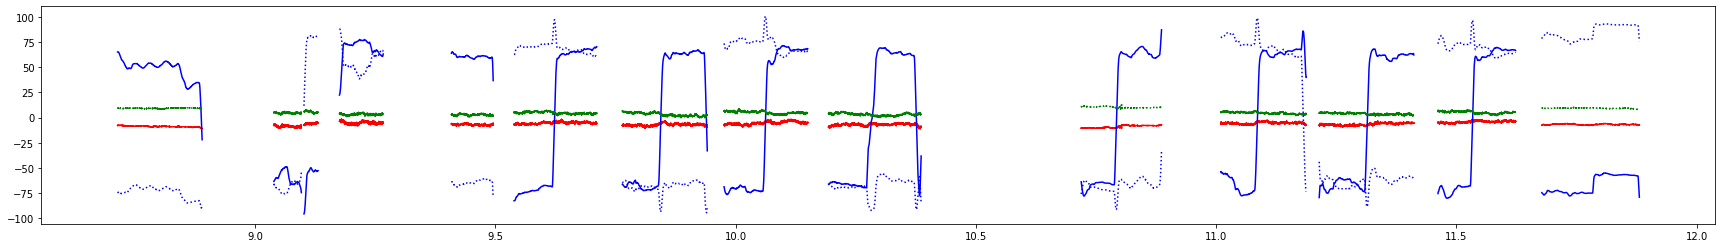

In [31]:
RF_AIMMS,RF_FCDP,RF_AAFCCN,RF_AOSCCN, RF_hlegs,RF_vlegs = ACEENA_load_saved_data('IOP1','20170718083145')

fig, ax = plt.subplots(figsize=[30,4])
print(RF_AIMMS.UTC[RF_AIMMS.hleg_s_idx[0]:RF_AIMMS.hleg_e_idx[0]])
for i in range(RF_AIMMS.nhleg):
    ax.plot(RF_AIMMS.UTC[RF_AIMMS.hleg_s_idx[i]:RF_AIMMS.hleg_e_idx[i]].to('hour'),RF_AIMMS.u_w[RF_AIMMS.hleg_s_idx[i]:RF_AIMMS.hleg_e_idx[i]],c='r',label='aircraft')
    ax.plot(RF_AIMMS.UTC[RF_AIMMS.hleg_s_idx[i]:RF_AIMMS.hleg_e_idx[i]].to('hour'),RF_AIMMS.u_i[RF_AIMMS.hleg_s_idx[i]:RF_AIMMS.hleg_e_idx[i]],c='b',label='wind')
    ax.plot(RF_AIMMS.UTC[RF_AIMMS.hleg_s_idx[i]:RF_AIMMS.hleg_e_idx[i]].to('hour'),RF_AIMMS.v_w[RF_AIMMS.hleg_s_idx[i]:RF_AIMMS.hleg_e_idx[i]],c='g',ls='dotted',label='aircraft')
    ax.plot(RF_AIMMS.UTC[RF_AIMMS.hleg_s_idx[i]:RF_AIMMS.hleg_e_idx[i]].to('hour'),RF_AIMMS.v_i[RF_AIMMS.hleg_s_idx[i]:RF_AIMMS.hleg_e_idx[i]],c='b',ls='dotted',label='wind')
plt.show()

In [ ]:
print(RF_AAFCCN.UTC[RF_AAFCCN.hleg_s_idx[5]:RF_AAFCCN.hleg_e_idx[5]].size)


In [ ]:
def ACEENA_post_analysis(IOP_stamp,RF_stamp,hleg_index,vleg_index,cloud_bund):
    plt.rcParams['figure.constrained_layout.use'] = True
    RF_AIMMS,RF_FCDP, RF_hlegs,RF_vlegs = ACEENA_load_saved_data(IOP_stamp,RF_stamp)
    save_path = "./"+IOP_stamp+"-"+RF_stamp+"/"
    print(type(hleg_index),hleg_index)
    #--------------------------------------------------------------------------------
    # plot the mean, std of Qc as a function of height
    import metpy.interpolate as mpinterp
    fig,ax=plt.subplots(constrained_layout=True)
    rho_air = 1.25 * units('kg/m^3')
    #ax.set_xlim([0,1.2])
    ax.set_ylim(cloud_bund)
    ax.set_xlabel(r'LWC [$g m^{-3}$]',fontsize='x-large')
    ax.set_ylabel(r'Altitude [$km$]',fontsize='x-large')
    for v in vleg_index:
        print('analyzing vleg', v)
        vleg_UTC_AIMMS = RF_AIMMS.UTC[RF_AIMMS.vleg_s_idx[v]:RF_AIMMS.vleg_e_idx[v]]
        vleg_alt_AIMMS = RF_AIMMS.Alt[RF_AIMMS.vleg_s_idx[v]:RF_AIMMS.vleg_e_idx[v]]
        if (RF_FCDP.vleg_s_idx[v] >=0) and (RF_FCDP.vleg_s_idx[v]<RF_FCDP.vleg_e_idx[v]):
            vleg_alt_FCDP = mpinterp.interpolate_1d(RF_FCDP.UTC[RF_FCDP.vleg_s_idx[v]:RF_FCDP.vleg_e_idx[v]],
                                                    vleg_UTC_AIMMS,vleg_alt_AIMMS)
        ax.plot((RF_FCDP.LWC[RF_FCDP.vleg_s_idx[v]:RF_FCDP.vleg_e_idx[v]].magnitude),\
                             vleg_alt_FCDP.to('km'),label='vleg {:2d}'.format(v),ls='dotted')
    ax.legend(loc='lower right',fontsize='x-large')
    #------------ plot errorbar ---------------------------------------------------------

    ms = 10
    xdata = RF_hlegs.hleg_qc_mean[hleg_index].magnitude*rho_air.magnitude*1000.0 #.to('g/kg')
    ydata = RF_hlegs.hleg_alt[hleg_index].to('km')
    xerr  = RF_hlegs.hleg_qc_std[hleg_index].magnitude*rho_air.magnitude*1000.0
    ax.errorbar(xdata,ydata.magnitude,xerr= xerr, fmt='o',ms=ms,c='r',fillstyle='none')
    for ih in range(len(hleg_index)):
        ax.annotate(str(hleg_index[ih]), (xdata[ih], ydata[ih].magnitude),fontsize='x-large')
    fig.savefig(save_path+'qc_mean_std_vs_height.png',dpi=300)
    
    
    #--------------------------------------------------------------------------------
    # plot the mean, std of Nc as a function of height
    fig,ax=plt.subplots(constrained_layout=True)
    #ax.set_xlim([0,200])
    ax.set_ylim(cloud_bund)
    ax.set_xlabel(r'CNDC [$cm^{-3}$]',fontsize='x-large')
    ax.set_ylabel(r'Altitude [$km$]',fontsize='x-large')
    for v in vleg_index:
        print('analyzing vleg', v)
        vleg_UTC_AIMMS = RF_AIMMS.UTC[RF_AIMMS.vleg_s_idx[v]:RF_AIMMS.vleg_e_idx[v]]
        vleg_alt_AIMMS = RF_AIMMS.Alt[RF_AIMMS.vleg_s_idx[v]:RF_AIMMS.vleg_e_idx[v]]
        if (RF_FCDP.vleg_s_idx[v] >=0) and (RF_FCDP.vleg_s_idx[v]<RF_FCDP.vleg_e_idx[v]):
            vleg_alt_FCDP = mpinterp.interpolate_1d(RF_FCDP.UTC[RF_FCDP.vleg_s_idx[v]:RF_FCDP.vleg_e_idx[v]],
                                                    vleg_UTC_AIMMS,vleg_alt_AIMMS)
        ax.plot((RF_FCDP.Nt[RF_FCDP.vleg_s_idx[v]:RF_FCDP.vleg_e_idx[v]].magnitude),\
                             vleg_alt_FCDP.to('km'),label='vleg {:2d}'.format(v),ls='dotted')
    ax.legend(loc='lower right',fontsize='x-large')
    #------------ plot errorbar ---------------------------------------------------------

    ms = 10
    xdata = RF_hlegs.hleg_Nc_mean[hleg_index].magnitude
    ydata = RF_hlegs.hleg_alt[hleg_index].to('km')
    xerr  = RF_hlegs.hleg_Nc_std[hleg_index].magnitude
    ax.errorbar(xdata,ydata.magnitude,xerr= xerr, fmt='^',ms=ms,c='b',fillstyle='none')
    for ih in range(len(hleg_index)):
        ax.annotate(str(hleg_index[ih]), (xdata[ih], ydata[ih].magnitude),fontsize='x-large')
    fig.savefig(save_path+'nc_mean_std_vs_height.png',dpi=300)
    
    #--------------------------------------------------------------------------------
    # plot the relative variance as a function of height
    fig,ax=plt.subplots(constrained_layout=True)
    #ax.set_xlim([0.1,1.0])
    ax.set_ylim(cloud_bund)
    ax.set_xlabel(r' Inverse Variance' ,fontsize='x-large')
    ax.set_ylabel(r'Altitude [$km$]',fontsize='x-large')
    ms = 10
    xdata = RF_hlegs.hleg_qc_mean[hleg_index].magnitude/RF_hlegs.hleg_qc_std[hleg_index].magnitude
    ydata = RF_hlegs.hleg_alt[hleg_index].to('km')
    ax.scatter(xdata,ydata.magnitude,s=150,edgecolors='r',marker='o',facecolors='none',label='$q_c$')
    for ih in range(len(hleg_index)):
        ax.annotate(str(hleg_index[ih]), (xdata[ih], ydata[ih].magnitude),fontsize='x-large')
        
    xdata = RF_hlegs.hleg_Nc_mean[hleg_index].magnitude/RF_hlegs.hleg_Nc_std[hleg_index].magnitude
    ydata = RF_hlegs.hleg_alt[hleg_index].to('km')
    ax.scatter(xdata,ydata.magnitude,s=150,edgecolors='b',marker='^',facecolors='none',label='$N_c$')
    for ih in range(len(hleg_index)):
        ax.annotate(str(hleg_index[ih]), (xdata[ih], ydata[ih].magnitude),fontsize='x-large')
    ax.legend(loc=0,fontsize='x-large')
    fig.savefig(save_path+'inverse_var_vs_height.png',dpi=300)
    
    #--------------------------------------------------------------------------------
    # plot the Qc and Nc correlation as a function of height
    fig,ax=plt.subplots(constrained_layout=True)
    #ax.set_xlim([0.1,1.0])
    ax.set_ylim(cloud_bund)
    ax.set_xlabel(r' $q_c$ and $N_c$ correlation',fontsize='x-large')
    ax.set_ylabel(r'Altitude [$km$]',fontsize='x-large')
    ms = 10
    xdata = RF_hlegs.hleg_qcnc_cor[hleg_index]
    ydata = RF_hlegs.hleg_alt[hleg_index].to('km')
    ax.scatter(xdata,ydata.magnitude,s=150,edgecolors='k',marker='s',facecolors='none')
    for ih in range(len(hleg_index)):
        ax.annotate(str(hleg_index[ih]), (xdata[ih], ydata[ih].magnitude),fontsize='x-large')
    
    fig.savefig(save_path+'qc_nc_cor_vs_height.png',dpi=300)
    
    
    #--------------------------------------------------------------------------------
    # plot Enf total as a function of height
    fig,ax=plt.subplots(constrained_layout=True)
    #ax.set_xlim([0.8,3.6])
    ax.set_ylim(cloud_bund)
    ax.set_xlabel(r'Ehancement Factor',fontsize='x-large')
    ax.set_ylabel(r'Altitude [$km$]',fontsize='x-large')
    ms = 10
    xdata1 = RF_hlegs.hleg_enf_Qc_mean_Nc_mean[hleg_index]
    xdata2 = RF_hlegs.hleg_enf_Qc_Nc_lognormal_joint[hleg_index]
    ydata = RF_hlegs.hleg_alt[hleg_index].to('km')
    ax.scatter(xdata1,ydata.magnitude,s=150,edgecolors='g',marker='*',label='observation')
    ax.scatter(xdata2,ydata.magnitude,s=150,edgecolors='g',marker='*',facecolors='none',label='bi-lognormal par.')
    for ih in range(len(hleg_index)):
        ax.annotate(str(hleg_index[ih]), (xdata1[ih], ydata[ih].magnitude),fontsize='x-large')
        ax.annotate(str(hleg_index[ih]), (xdata2[ih], ydata[ih].magnitude),fontsize='x-large')
    ax.legend(loc=0,fontsize='x-large')    
    fig.savefig(save_path+'enf_total_vs_height.png',dpi=300)
    
    #--------------------------------------------------------------------------------
    # plot Enf Qc as a function of height
    fig,ax=plt.subplots(constrained_layout=True)
    #ax.set_xlim([0.8,3.6])
    ax.set_ylim(cloud_bund)
    ax.set_xlabel(r'Ehancement Factor',fontsize='x-large')
    ax.set_ylabel(r'Altitude [$km$]',fontsize='x-large')
    ms = 10
    xdata1 = RF_hlegs.hleg_enf_Qc_mean[hleg_index]
    xdata2 = RF_hlegs.hleg_enf_Qc_par[hleg_index]
    ydata = RF_hlegs.hleg_alt[hleg_index].to('km')
    ax.scatter(xdata1,ydata.magnitude,s=150,edgecolors='r',marker='o',facecolors='r',  label='observation')
    ax.scatter(xdata2,ydata.magnitude,s=150,edgecolors='r',marker='o',facecolors='none',label='lognormal par.')
    for ih in range(len(hleg_index)):
        ax.annotate(str(hleg_index[ih]), (xdata1[ih], ydata[ih].magnitude),fontsize='x-large')
        ax.annotate(str(hleg_index[ih]), (xdata2[ih], ydata[ih].magnitude),fontsize='x-large')
    ax.legend(loc=0,fontsize='x-large')        
    fig.savefig(save_path+'enf_qc_vs_height.png',dpi=300)
    
    #--------------------------------------------------------------------------------
    # plot Enf Nc as a function of height
    fig,ax=plt.subplots()
    #ax.set_xlim([0.8,6.0])
    ax.set_ylim(cloud_bund)
    ax.set_xlabel(r'Ehancement Factor',fontsize='x-large')
    ax.set_ylabel(r'Altitude [$km$]',fontsize='x-large')
    xdata1 = RF_hlegs.hleg_enf_Nc_mean[hleg_index]
    xdata2 = RF_hlegs.hleg_enf_Nc_par[hleg_index]
    ydata =  RF_hlegs.hleg_alt[hleg_index].to('km')
    ax.scatter(xdata1,ydata.magnitude,s=150,edgecolors='b',marker='^',facecolors='b',  label='observation')
    ax.scatter(xdata2,ydata.magnitude,s=150,edgecolors='b',marker='^',facecolors='none',label='lognormal par.')
    for ih in range(len(hleg_index)):
        ax.annotate(str(hleg_index[ih]), (xdata1[ih], ydata[ih].magnitude),fontsize='x-large')
        ax.annotate(str(hleg_index[ih]), (xdata2[ih], ydata[ih].magnitude),fontsize='x-large')
    ax.legend(loc='center right',fontsize='x-large')        
    fig.savefig(save_path+'enf_Nc_vs_height.png',dpi=300)
    
    #--------------------------------------------------------------------------------
    # plot Enf cov as a function of height
    fig,ax=plt.subplots()
    #ax.set_xlim([0.8,3.6])
    ax.set_ylim(cloud_bund)
    ax.set_xlabel(r'Ehancement Factor',fontsize='x-large')
    ax.set_ylabel(r'Altitude [$km$]',fontsize='x-large')
    #xdata1 = RF_hlegs.hleg_enf_cov[hleg_index]
    xdata2 = RF_hlegs.hleg_enf_cov[hleg_index]
    ydata =  RF_hlegs.hleg_alt[hleg_index].to('km')
    #ax.scatter(xdata1,ydata.magnitude,s=150,edgecolors='b',marker='^',facecolors='b',  label='observation')
    ax.scatter(xdata2,ydata.magnitude,s=150,edgecolors='k',marker='s',facecolors='none',label='bi-lognormal par.')
    for ih in range(len(hleg_index)):
        #ax.annotate(str(hleg_index[ih]), (xdata1[ih], ydata[ih].magnitude),fontsize='x-large')
        ax.annotate(str(hleg_index[ih]), (xdata2[ih], ydata[ih].magnitude),fontsize='x-large')
    ax.legend(loc=0,fontsize='x-large')        
    fig.savefig(save_path+'enf_cov_vs_height.png',dpi=300)
    
    '''
    
    #--------------------------------------------------------------------------------
    # plot the enhancement factor as a function of height
    
    X1  = RF_hlegs.hleg_enf_Qc_mean_Nc_mean
    X10 = RF_hlegs.hleg_enf_Qc_Nc_lognormal_joint
    
    X2  = RF_hlegs.hleg_enf_Qc_mean
    X20 = RF_hlegs.hleg_enf_Qc_par
    
    X3  = RF_hlegs.hleg_enf_Nc_mean
    X30 = RF_hlegs.hleg_enf_Nc_par
    
    X4  = RF_hlegs.hleg_qcnc_cor
    X40 = RF_hlegs.hleg_enf_cov
    
    Y = RF_hlegs.hleg_alt
    N = np.arange(len(X1))
    ms = 100
    fig,ax = plt.subplots(2,2,constrained_layout=True,figsize=[16,10])
    ax[0,0].scatter(X1,Y, s=ms,marker='o',c=RF_hlegs.hleg_CF, cmap=plt.cm.coolwarm)
    ax[0,0].scatter(X10,Y,s=ms,marker='o',edgecolors='k',facecolors='none')
    
    ax[0,1].scatter(X2, Y,s=ms,marker='s',c=RF_hlegs.hleg_CF, cmap=plt.cm.coolwarm)
    ax[0,1].scatter(X20,Y,s=ms,marker='s',edgecolors='k',facecolors='none')
    
    ax[1,0].scatter(X3,Y, s=ms,marker='v',c=RF_hlegs.hleg_CF, cmap=plt.cm.coolwarm)
    ax[1,0].scatter(X30,Y,s=ms,marker='v',edgecolors='k',facecolors='none')
    mappable =ax[1,1].scatter(X4,Y,s=ms,marker='*',c=RF_hlegs.hleg_CF, cmap=plt.cm.coolwarm)
    fig.colorbar(mappable, ax=ax[:, 1],label='Cloud Fraction',aspect=40)
    for i, txt in enumerate(N):
        ax[0,0].annotate(txt, (X1[i], Y[i].magnitude))
        ax[0,0].annotate(txt, (X10[i], Y[i].magnitude))
        
        ax[0,1].annotate(txt, (X2[i], Y[i].magnitude))
        ax[0,1].annotate(txt, (X20[i], Y[i].magnitude))
        
        ax[1,0].annotate(txt, (X3[i], Y[i].magnitude))
        ax[1,0].annotate(txt, (X30[i], Y[i].magnitude))
        
        ax[1,1].annotate(txt, (X4[i], Y[i].magnitude))
        
        
    ax[0,0].set_xlabel('EnF Qc_mean_Nc_mean') 
    ax[0,0].set_ylabel('Height [m]')
    ax[0,1].set_xlabel('EnF Qc_mean') 
    ax[0,1].set_ylabel('Height [m]')
    ax[1,0].set_xlabel('EnF Nc_mean') 
    ax[1,0].set_ylabel('Height [m]')
    ax[1,1].set_xlabel('Qc_Nc Cor') 
    ax[1,1].set_ylabel('Height [m]')
    for Zb in RF_vlegs.Zb:
        for axis in ax.flat:
            axis.axhline(Zb.magnitude,ls='dashed',c='b',lw=0.5)
                       
    for Zt in RF_vlegs.Zt:
        for axis in ax.flat:
            axis.axhline(Zt.magnitude,ls='dashed',c='r',lw=0.5)
    plt.show()
    fig.savefig(save_path+'enf_vs_height.png',dpi=200)
   '''

In [ ]:
IOP_stamp = 'IOP2'
RF_stamp = '20180211112034'
cloud_bund = [0.2,2.0]
hleg_index = [4,5,6,7,12,13] #[5,6,7,8,9,13,14] #[5,6,7,8,10,11,12][5,6,7,12,13] #[6,7,8,15,16] #
vleg_index = [0,1,2,3]

ACEENA_post_analysis(IOP_stamp,RF_stamp,hleg_index,vleg_index,cloud_bund )

In [ ]:
def Enf_vs_height_analysis():
    from scipy import stats
    plt.rcParams['figure.constrained_layout.use'] = True
    case_hindex = {'20170718083145':[5,6,7,8,10,11,12],\
                   '20170720083203':[5,6,7,8,9,13,14],\
                   '20180119121131':[8,15,16],\
                   '20180211112034':[4,5,6,7,12,13]}
    
    case_vindex = {'20170718083145':[0,1,3],\
                   '20170720083203':[0,1],\
                   '20180119121131':[0,1,3],\
                   '20180211112034':[0,1]}
    
    case_marker = {'20170718083145':'o',\
                   '20170720083203':'s',\
                   '20180119121131':'^',\
                   '20180211112034':'D'}
    case_color = {'20170718083145':'r',\
                   '20170720083203':'g',\
                   '20180119121131':'b',\
                   '20180211112034':'k'}
    
    case_RF_AIMMS = {}
    case_RF_hlegs = {}
    case_RF_vlegs = {}
    case_RF_FCDP  = {} 
    case_RF_AIMMS = {}
    
    case_norm_height = np.array([])
    case_Enf_total  = np.array([])
    case_Enf_Qc    = np.array([])
    case_Enf_Nc    = np.array([])
    case_qcnc_cov   = np.array([])
    
    fig,ax = plt.subplots(2,2,figsize=[12,8],constrained_layout=True)
    
    for RF_stamp in case_hindex:
        IOP_stamp = 'IOP1' if RF_stamp[0:4] == '2017' else 'IOP2'
        print(IOP_stamp,RF_stamp)
        RF_AIMMS,RF_FCDP, RF_hlegs,RF_vlegs = ACEENA_load_saved_data(IOP_stamp,RF_stamp)
        case_RF_AIMMS[RF_stamp] = RF_AIMMS
        case_RF_FCDP[RF_stamp] = RF_FCDP
        case_RF_hlegs[RF_stamp] = RF_hlegs
        case_RF_vlegs[RF_stamp] = RF_vlegs
        
        hleg_index = case_hindex[RF_stamp]
        vleg_index = case_vindex[RF_stamp]

        case_cloud_top  = RF_hlegs.hleg_alt[hleg_index].max()
        case_cloud_base = RF_hlegs.hleg_alt[hleg_index].min()
        case_cloud_thickness = case_cloud_top - case_cloud_base
        case_norm_z    = (RF_hlegs.hleg_alt[hleg_index] - case_cloud_base)/(case_cloud_thickness)
        case_norm_height = np.append(case_norm_height,case_norm_z)
        case_Enf_total  = np.append( case_Enf_total,RF_hlegs.hleg_enf_Qc_mean_Nc_mean[hleg_index])
        case_Enf_Qc  = np.append( case_Enf_Qc,RF_hlegs.hleg_enf_Qc_mean[hleg_index])
        case_Enf_Nc  = np.append( case_Enf_Nc,RF_hlegs.hleg_enf_Nc_mean[hleg_index])
        case_qcnc_cov  = np.append( case_qcnc_cov,RF_hlegs.hleg_qcnc_cor[hleg_index])
        
        ax[0,0].scatter(RF_hlegs.hleg_enf_Qc_mean_Nc_mean[hleg_index],case_norm_z,s=150,\
                        marker=case_marker[RF_stamp],c=case_color[RF_stamp],label=RF_stamp[0:8])
        ax[0,1].scatter(RF_hlegs.hleg_enf_Qc_mean[hleg_index],case_norm_z,s=150,\
                        marker=case_marker[RF_stamp],c=case_color[RF_stamp],label=RF_stamp[0:8])
        ax[1,0].scatter(RF_hlegs.hleg_enf_Nc_mean[hleg_index],case_norm_z,s=150,\
                        marker=case_marker[RF_stamp],c=case_color[RF_stamp],label=RF_stamp[0:8])
        ax[1,1].scatter(RF_hlegs.hleg_qcnc_cor[hleg_index],case_norm_z,s=150,\
                        marker=case_marker[RF_stamp],c=case_color[RF_stamp],label=RF_stamp[0:8])
    
    ax[0,0].set_xlabel('Enhancement Factor $q_c$ and $N_c$',fontsize='x-large')
    ax[0,0].set_ylabel('Normalized height',fontsize='x-large')
    #ax.scatter(case_Enf_total,case_norm_height,s=150,marker='*')
    slope, intercept, r_value, p_value, std_err = stats.linregress(case_Enf_total,case_norm_height)
    ls = 'solid' if p_value<0.05 else 'dotted'
    if p_value<0.05:
        xx = np.linspace(case_Enf_total.min(),case_Enf_total.max(),100)
        ax[0,0].plot(xx, intercept + slope*xx, 'k', label='linear fit',ls='dotted')
    print('rvalue',r_value,'pvalue',p_value)
    
    ax[0,1].set_xlabel('Enhancement Factor $q_c$ only',fontsize='x-large')
    ax[0,1].set_ylabel('Normalized height',fontsize='x-large')
    slope, intercept, r_value, p_value, std_err = stats.linregress(case_Enf_Qc,case_norm_height)
    ls = 'solid' if p_value<0.05 else 'dotted'
    if p_value<0.05:
        xx = np.linspace(case_Enf_Qc.min(),case_Enf_Qc.max(),100)
        ax[0,1].plot(xx, intercept + slope*xx, 'k', label='linear fit',ls='dotted')
    print('rvalue',r_value,'pvalue',p_value)
    
    ax[1,0].set_xlabel('Enhancement Factor $N_c$ only',fontsize='x-large')
    ax[1,0].set_ylabel('Normalized height',fontsize='x-large')
    slope, intercept, r_value, p_value, std_err = stats.linregress(case_Enf_Nc,case_norm_height)
    ls = 'solid' if p_value<0.05 else 'dotted'
    if p_value<0.05:
        xx = np.linspace(case_Enf_Nc.min(),case_Enf_Nc.max(),100)
        ax[1,0].plot(xx, intercept + slope*xx, 'k', label='linear fit',ls='dotted')
    print('rvalue',r_value,'pvalue',p_value)
    
    ax[1,1].set_xlabel('$q_c$ , $N_c$ correlation',fontsize='x-large')
    ax[1,1].set_ylabel('Normalized height',fontsize='x-large')
    slope, intercept, r_value, p_value, std_err = stats.linregress( case_qcnc_cov ,case_norm_height)
    ls = 'solid' if p_value<0.05 else 'dotted'
    if p_value<0.05:
        xx = np.linspace(case_qcnc_cov.min(),case_qcnc_cov.max(),100)
        ax[1,1].plot(xx, intercept + slope*xx, 'k', label='linear fit',ls='dotted')
    print('rvalue',r_value,'pvalue',p_value)
    
   
    plt.legend(loc=0)
    fig.savefig('Enf_vs_height_selected_cases.png',dpi=300)
    
    #----------------------------------------------------------------------------------------------#
    fig,ax = plt.subplots(3,1,figsize=[6,12],constrained_layout=True)
    for RF_stamp in case_hindex:
        ax[0].scatter(case_RF_hlegs[RF_stamp].hleg_enf_Qc_mean[hleg_index],\
                      case_RF_hlegs[RF_stamp].hleg_enf_Qc_par[hleg_index],\
                      s=150,marker=case_marker[RF_stamp],c=case_color[RF_stamp],label=RF_stamp[0:8])
        
        ax[1].scatter(case_RF_hlegs[RF_stamp].hleg_enf_Nc_mean[hleg_index],\
                      case_RF_hlegs[RF_stamp].hleg_enf_Nc_par[hleg_index],\
                      s=150,marker=case_marker[RF_stamp],c=case_color[RF_stamp],label=RF_stamp[0:8])
        
        ax[2].scatter(case_RF_hlegs[RF_stamp].hleg_enf_Qc_mean_Nc_mean[hleg_index],\
                   case_RF_hlegs[RF_stamp].hleg_enf_Qc_Nc_lognormal_joint[hleg_index],\
                   s=150,marker=case_marker[RF_stamp],c=case_color[RF_stamp],label=RF_stamp[0:8])
       
    ax[0].set_xlim([0.8,8])
    ax[0].set_ylim([0.8,8])
    ax[1].set_xlim([0.8,8])
    ax[1].set_ylim([0.8,8])
    ax[2].set_xlim([0.8,4])
    ax[2].set_ylim([0.8,4])
    ax[0].plot([0.8,8],[0.8,8],ls='dotted',c='k',lw=2.0)
    ax[1].plot([0.8,8],[0.8,8],ls='dotted',c='k',lw=2.0)
    ax[2].plot([0.8,8],[0.8,8],ls='dotted',c='k',lw=2.0)
    
    ax[0].set_xlabel('E.F. $q_c$ only observation',fontsize='x-large')
    ax[0].set_ylabel('E.F. $q_c$ only lognormal par.',fontsize='x-large')
    ax[1].set_xlabel('E.F. $N_c$ only observation',fontsize='x-large')
    ax[1].set_ylabel('E.F. $N_c$ only lognormal par.',fontsize='x-large')
    ax[2].set_xlabel('E.F. $q_c$ and $N_c$ observation',fontsize='x-large')
    ax[2].set_ylabel('E.F. $q_c$ and $N_c$ bi-lognormal par.',fontsize='x-large')
    plt.legend(loc=0)
    fig.savefig('Enf_obs_vs_par_selected_cases.png',dpi=300)
    #----------------------------------------------------------------------------------------------#
    fig,ax = plt.subplots(figsize=[6,4],constrained_layout=True)
    for RF_stamp in case_hindex:
        c=ax.scatter(case_RF_hlegs[RF_stamp].hleg_enf_Qc_Nc_lognormal_joint[hleg_index],\
                       case_RF_hlegs[RF_stamp].hleg_enf_Qc_par[hleg_index],\
                       s=200,marker='h',c= case_RF_hlegs[RF_stamp].hleg_qcnc_cor[hleg_index],\
                       label=RF_stamp[0:8],cmap='viridis')
    cbar = plt.colorbar(c)
    cbar.set_label(label='$q_c$ , $N_c$ correlation', weight='bold',size='x-large')
    ax.set_xlabel('E.F. $q_c$ and $N_c$ bi-lognormal par.',fontsize='x-large')
    ax.set_ylabel('E.F. $q_c$ only lognormal par.',fontsize='x-large')
    ax.set_xlim([0.8,6])
    ax.set_ylim([0.8,6])
    ax.plot([0,8],[0,8],c='k',ls='dotted',lw=2)
    fig.savefig('Enf_effect_of_cov_selected_cases.png',dpi=300)
        
#         ax[1].scatter(case_RF_hlegs[RF_stamp].hleg_enf_Nc_mean[hleg_index],\
#                       case_RF_hlegs[RF_stamp].hleg_enf_Nc_par[hleg_index],\
#                       s=150,marker=case_marker[RF_stamp],c=case_color[RF_stamp],label=RF_stamp[0:8])
        
#         ax[2].scatter(case_RF_hlegs[RF_stamp].hleg_enf_Qc_mean_Nc_mean[hleg_index],\
#                    case_RF_hlegs[RF_stamp].hleg_enf_Qc_Nc_lognormal_joint[hleg_index],\
#                    s=150,marker=case_marker[RF_stamp],c=case_color[RF_stamp],label=RF_stamp[0:8])
       
#     ax[0].set_xlim([0.8,8])
#     ax[0].set_ylim([0.8,8])
#     ax[1].set_xlim([0.8,8])
#     ax[1].set_ylim([0.8,8])
#     ax[2].set_xlim([0.8,4])
#     ax[2].set_ylim([0.8,4])
#     ax[0].plot([0.8,8],[0.8,8],ls='dotted',c='k',lw=2.0)
#     ax[1].plot([0.8,8],[0.8,8],ls='dotted',c='k',lw=2.0)
#     ax[2].plot([0.8,8],[0.8,8],ls='dotted',c='k',lw=2.0)
    
#     ax[0].set_xlabel('E.F. $q_c$ only observation',fontsize='x-large')
#     ax[0].set_ylabel('E.F. $q_c$ only lognormal par.',fontsize='x-large')
#     ax[1].set_xlabel('E.F. $N_c$ only observation',fontsize='x-large')
#     ax[1].set_ylabel('E.F. $N_c$ only lognormal par.',fontsize='x-large')
#     ax[2].set_xlabel('E.F. $q_c$ and $N_c$ observation',fontsize='x-large')
#     ax[2].set_ylabel('E.F. $q_c$ and $N_c$ bi-ognormal par.',fontsize='x-large')
#     plt.legend(loc=0)
#    fig.savefig('Enf_obs_vs_par_selected_cases.png',dpi=300)
    
    plt.show()
    
 
        
        
            
        
    
    

In [ ]:
Enf_vs_height_analysis()

In [ ]:
def CCN_analysis(IOP_stamp,RF_stamp, RF_AIMMS,RF_AAFCCN, RF_hlegs,RF_vlegs):
    RF_AIMMS,RF_FCDP,RF_AAFCCN,RF_AOSCCN, RF_hlegs,RF_vlegs = ACEENA_load_saved_data(IOP_stamp,RF_stamp)
    save_path = "./"+IOP_stamp+"-"+RF_stamp+"/"
    from mpl_toolkits.basemap import Basemap
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
    fig,ax = plt.subplots(figsize=[20,4])
    ax.plot(RF_AAFCCN.UTC.to('hours'),RF_AAFCCN.N_CCN_1,c='r',\
        label='CCN at SS {:4.2}%'.format(RF_AAFCCN.CCN_supersaturation_set_point_1.mean()))
    ax.plot(RF_AAFCCN.UTC.to('hours'),RF_AAFCCN.N_CCN_2,c='b',\
        label='CCN at SS {:4.2}%'.format(RF_AAFCCN.CCN_supersaturation_set_point_2.mean()))
    ax.set_ylim(0,220)
    ax.set_xlim(8,12)
    for i in range(RF_AIMMS.nhleg):
        #print(RF_AIMMS.hleg_s_UTC[i].units)
        ax.axvspan(RF_AIMMS.hleg_s_UTC[i].to('hours').magnitude,RF_AIMMS.hleg_e_UTC[i].to('hours').magnitude,color='y',alpha=0.5)
        ax.text(0.5*(RF_AIMMS.hleg_s_UTC[i]+RF_AIMMS.hleg_e_UTC[i]).to('hours').magnitude,2.0,'{:}'.format(i),\
                     ha="center", va="center",size=8, bbox=bbox_props)
    for j in range(len(RF_AIMMS.vleg_dis)):
        ax.axvspan(RF_AIMMS.vleg_s_UTC[j].to('hour').magnitude,RF_AIMMS.vleg_e_UTC[j].to('hour').magnitude,color='g',alpha=0.5)
        ax.text(0.5*(RF_AIMMS.vleg_s_UTC[j]+RF_AIMMS.vleg_e_UTC[j]).to('hours').magnitude,2.0,'{:}'.format(j),\
                     ha="center", va="center",size=8, bbox=bbox_props)
    
    ax.legend()
    fig.savefig(save_path+'CCN_whole_RF',dpi=300)
    
    for i in range(RF_AIMMS.nhleg):
        fig,ax = plt.subplots(1,2,figsize=[12,3],constrained_layout=True)
        s,e=RF_AAFCCN.hleg_s_idx[i],RF_AAFCCN.hleg_e_idx[i]
        print(s,e)
        ax[0].plot(RF_AAFCCN.UTC[s:e].to('hours'),RF_AAFCCN.N_CCN_1[s:e],c='r',\
                   label='CCN at SS {:4.2}%'.format(RF_AAFCCN.CCN_supersaturation_set_point_1.mean()))
        ax[0].plot(RF_AAFCCN.UTC[s:e].to('hours'),RF_AAFCCN.N_CCN_2[s:e],c='b',\
                   label='CCN at SS {:4.2}%'.format(RF_AAFCCN.CCN_supersaturation_set_point_2.mean()))
        ax[0].set_ylim(0,220)
        #ax[0].set_xlim(8,12)
        
        ax[1].hist(RF_AAFCCN.N_CCN_1[s:e].magnitude,bins=30,color='r',alpha=0.5,\
                  label='CCN at SS {:4.2}%'.format(RF_AAFCCN.CCN_supersaturation_set_point_1.mean()))
        ax[1].hist(RF_AAFCCN.N_CCN_2[s:e].magnitude,bins=30,color='b',alpha=0.5,\
                  label='CCN at SS {:4.2}%'.format(RF_AAFCCN.CCN_supersaturation_set_point_2.mean()))
        ax[1].set_xlim(0,220)
        #ax[1].set_xlim(8,12)
        ax[0].set_xlabel(r'UTC [$hour$]',fontsize='large')
        ax[0].set_ylabel(r'CCN [$cm^3$]',fontsize='large')
        ax[1].set_xlabel(r'CCN [$cm^3$]',fontsize='large')
        ax[1].set_ylabel(r'PDF [count]',fontsize='large')
        ax[0].legend()
        ax[0].set_title('hleg {:2d}'.format(i),fontsize='x-large')
        ax[1].set_title('hleg {:2d}'.format(i),fontsize='x-large')
        
        fig.savefig(save_path+'hleg_{:02d}_AAFCCN.png'.format(i),dpi=300)
    
        

        fig,ax=plt.subplots(figsize=[10,10])
        map = Basemap(llcrnrlon=RF_AIMMS.Lon.min().magnitude,llcrnrlat=RF_AIMMS.Lat.min().magnitude,
                      urcrnrlon=RF_AIMMS.Lon.max().magnitude,urcrnrlat=RF_AIMMS.Lat.max().magnitude,
                      resolution='h')
   

        map.drawmapboundary(fill_color='aqua')
        parallels = np.arange(RF_AIMMS.Lat.min().magnitude,RF_AIMMS.Lat.max().magnitude,0.1)   
        meridians = np.arange(RF_AIMMS.Lon.min().magnitude,RF_AIMMS.Lon.max().magnitude,0.1) 
        lat_labels = np.zeros(parallels.size)
        lon_labels = np.zeros(meridians.size)
        lat_labels[1::2] = 1
        lon_labels[1::2] = 1
        map.drawparallels(parallels,labels=lat_labels, fmt='%3.1f')
        map.drawmeridians(meridians,labels=lon_labels, fmt='%3.1f')
        map.fillcontinents(color='green',lake_color='aqua',alpha=0.7)
        map.drawcoastlines()
        s,e=RF_AIMMS.hleg_s_idx[i],RF_AIMMS.hleg_e_idx[i]
        x, y = map(RF_AIMMS.Lon[s:e], RF_AIMMS.Lat[s:e])
        map.plot(x,y,lw=1.5,c='r')
        ax.set_title('hleg {:2d}'.format(i),fontsize='x-large')
        
        fig,ax=plt.subplots(1,2,figsize=[12,3],constrained_layout=True)
        s,e=RF_AAFCCN.hleg_s_idx[i],RF_AAFCCN.hleg_e_idx[i]
        cf1=ax[0].pcolormesh(RF_AAFCCN.UTC[s:e].to('hour'),RF_AAFCCN.size_bin*1e6,np.transpose(RF_AAFCCN.N_CCN_dN_1[s:e,:]))
        cf2=ax[1].pcolormesh(RF_AAFCCN.UTC[s:e].to('hour'),RF_AAFCCN.size_bin*1e6,np.transpose(RF_AAFCCN.N_CCN_dN_2[s:e,:]))
        ax[0].set_xlabel(r'UTC [$hour$]',fontsize='large')
        ax[0].set_ylabel(r'bins [$\mu m$]',fontsize='large')
        ax[1].set_xlabel(r'UTC [$hour$]',fontsize='large')
        ax[1].set_ylabel(r'bins [$\mu m$]',fontsize='large')
        
        ax[0].set_title(r'hleg_{0:02d}_SS{1:6.2f}'.format(i,RF_AAFCCN.CCN_supersaturation_set_point_1.mean()),fontsize='x-large')
        ax[1].set_title(r'hleg_{0:02d}_SS{1:6.2f}'.format(i,RF_AAFCCN.CCN_supersaturation_set_point_2.mean()),fontsize='x-large')
        
        
        fig.colorbar(cf1,ax=ax[0], label='counts/s in each bin')
        fig.colorbar(cf2,ax=ax[1], label='counts/s in each bin')
        fig.savefig(save_path+'hleg_{:02d}_AAFCCN_size_resolved.png'.format(i),dpi=300)
        
        
        fig,ax = plt.subplots(figsize=[20,4])
        s,e=RF_AOSCCN.hleg_s_idx[i],RF_AOSCCN.hleg_e_idx[i]
        ax.plot(RF_AOSCCN.UTC[s:e].to('hours'),RF_AOSCCN.N_CCN[s:e],c='r')
        ax2 = ax.twinx() 
        ax2.plot(RF_AOSCCN.UTC[s:e].to('hours'),RF_AOSCCN.CCN_supersaturation_set_point[s:e],c='b')
        ax.set_ylim(0,400)
        ax.set_title(r'hleg_{0:02d}_AOSCCN.png'.format(i),fontsize='x-large')
        
        
        
    plt.show()
    
CCN_analysis('IOP1','20170718083145',RF_AIMMS,RF_AAFCCN, RF_hlegs,RF_vlegs)

In [ ]:
RF_AIMMS,RF_FCDP,RF_AAFCCN,RF_AOSCCN, RF_hlegs,RF_vlegs = ACEENA_load_saved_data(IOP_stamp,RF_stamp)
save_path = "./"+IOP_stamp+"-"+RF_stamp+"/"
SS_grids = [RF_AAFCCN.CCN_supersaturation_set_point_1.mean(),RF_AAFCCN.CCN_supersaturation_set_point_2.mean()]
print(np.unique(RF_AOSCCN.CCN_supersaturation_set_point))

CCN_0p1_idx = (RF_AOSCCN.CCN_supersaturation_set_point == 0.1) & \
              (RF_AOSCCN.UTC.to('hours').magnitude<12) & (RF_AOSCCN.UTC.to('hours').magnitude>8)
CCN_0p2_idx = (RF_AOSCCN.CCN_supersaturation_set_point == 0.2) & \
              (RF_AOSCCN.UTC.to('hours').magnitude<12) & (RF_AOSCCN.UTC.to('hours').magnitude>8)
CCN_0p5_idx = (RF_AOSCCN.CCN_supersaturation_set_point == 0.5) & \
              (RF_AOSCCN.UTC.to('hours').magnitude<12) & (RF_AOSCCN.UTC.to('hours').magnitude>8)
CCN_1p0_idx = (RF_AOSCCN.CCN_supersaturation_set_point == 1.0) & \
              (RF_AOSCCN.UTC.to('hours').magnitude<12) & (RF_AOSCCN.UTC.to('hours').magnitude>8)

print(CCN_0p2_idx.sum(),CCN_0p5_idx.sum())

CCN_0p2,CCN_0p5 =  RF_AOSCCN.N_CCN[CCN_0p2_idx],RF_AOSCCN.N_CCN[CCN_0p5_idx]
CCN_0p1,CCN_1p0 =  RF_AOSCCN.N_CCN[CCN_0p1_idx],RF_AOSCCN.N_CCN[CCN_1p0_idx]

fig,ax = plt.subplots(4,1,figsize=[12,12],constrained_layout=True)
ax[0].hist(CCN_0p1,bins=30,color='r',alpha=0.5,label='SS=0.1%')
ax[1].hist(CCN_0p2,bins=30,color='g',alpha=0.5,label='SS=0.2%')
ax[2].hist(CCN_0p5,bins=30,color='b',alpha=0.5,label='SS=0.5%')
ax[3].hist(CCN_1p0,bins=30,color='k',alpha=0.5,label='SS=1.0%')
for axs in ax:
    axs.set_xlabel(r'CCN [$cm^{-3}$]',fontsize='x-large')
    axs.set_ylabel(r'PDF [$count$]',fontsize='x-large')
    axs.set_xlim([0,220])
    axs.legend()
fig.savefig(save_path+'AOSCCN.png',dpi=300)
print(CCN_0p2.size,CCN_0p2.mean(),np.median(CCN_0p2),CCN_0p2.std())
print(CCN_0p5.size,CCN_0p5.mean(),np.median(CCN_0p5),CCN_0p5.std())

In [ ]:
print(RF_hlegs.hleg_CF)

In [ ]:
RF_CF_idx = RF_hlegs.hleg_CF> 0.1
fig,ax = plt.subplots(RF_CF_idx.sum(),2,figsize=[15,3*RF_CF_idx.sum()],constrained_layout=True)
save_path = "./"+IOP_stamp+"-"+RF_stamp+"/"
j=-1
for i in range(RF_hlegs.hleg_dis.size):
    if RF_hlegs.hleg_CF[i] > 0.1:
        j+=1
        s,e=RF_FCDP.hleg_s_idx[i],RF_FCDP.hleg_e_idx[i]
        ax[j,0].hist(RF_FCDP.Nt[s:e],bins=20,alpha=0.3)
        ax[j,0].set_title('hleg_{0:02d}'.format(i))
        ax[j,1].hist(np.log10(RF_FCDP.LWC[s:e].magnitude+1e-10),bins=20,alpha=0.3)
        ax[j,1].set_title('hleg_{0:02d}'.format(i))
for axs in ax[:,0]:
    axs.set_xlim([0,200])
    axs.set_xlabel(r'CDNC [$cm^{-3}$]',fontsize='x-large')
    axs.set_ylabel(r'count',fontsize='x-large')
fig.savefig(save_path+'CDNC.png',dpi=300)

In [ ]:
RF_hlegs.hleg_qc_mean *1.25 * 1e3

In [ ]:
fig, ax = plt.subplots()
s,e=RF_FCDP.hleg_s_idx[8],RF_FCDP.hleg_e_idx[8]
ax.hist(np.log10(RF_FCDP.LWC[s:e].magnitude+1e-10),bins=20,alpha=0.3,color='r',label='hleg 8')
print(np.nanmean(RF_FCDP.LWC[s:e]))
s,e=RF_FCDP.hleg_s_idx[12],RF_FCDP.hleg_e_idx[12]
ax.hist(np.log10(RF_FCDP.LWC[s:e].magnitude+1e-10),bins=20,alpha=0.3,color='b',label='hleg 12')
print(np.nanmean(RF_FCDP.LWC[s:e]))

ax.legend()

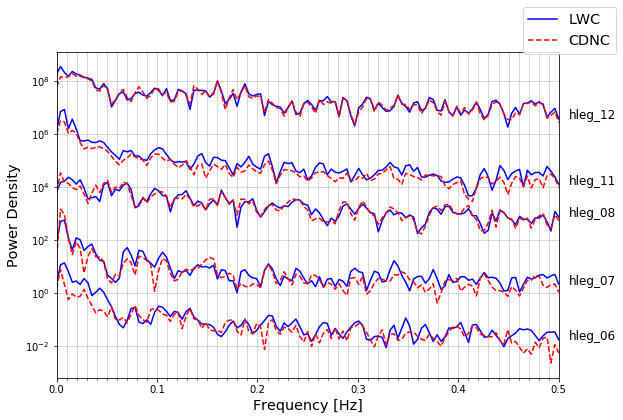

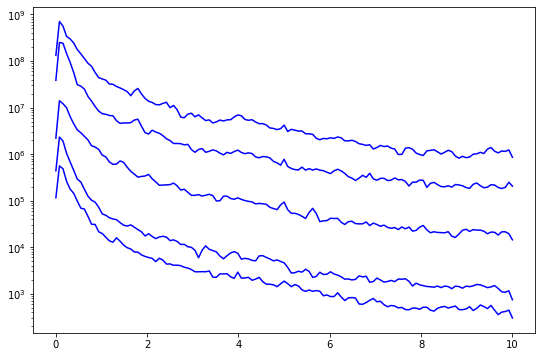

In [32]:
def power_spectrum_analysis(IOP_stamp,RF_stamp):
    RF_AIMMS,RF_FCDP,RF_AAFCCN,RF_AOSCCN, RF_hlegs,RF_vlegs = ACEENA_load_saved_data(IOP_stamp,RF_stamp)
    save_path = "./"+IOP_stamp+"-"+RF_stamp+"/"
    from scipy import signal
    from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                                   AutoMinorLocator)

    j=-1
    fig,ax=plt.subplots(figsize=[9,6])
    for i in range(RF_hlegs.hleg_dis.size):
        if RF_hlegs.hleg_CF[i] > 0.6:    
            j+=1
            s,e=RF_FCDP.hleg_s_idx[i],RF_FCDP.hleg_e_idx[i]
            x = RF_FCDP.LWC[s:e].magnitude
            x[np.isnan(x)] = 0.0        
            fx, Pxx_den_lwc = signal.welch(x/x.mean(), 1)


            y = RF_FCDP.Nt[s:e].magnitude
            y[np.isnan(y)] = 0.0
            fy, Pxx_den_Nt = signal.welch(y/y.mean(), 1,)


            ax.semilogy(fx, Pxx_den_lwc*np.power(100,j),c='b',ls='solid')
            ax.semilogy(fy, Pxx_den_Nt*np.power(100,j),c='r',ls='dashed')
            ax.set_xlim([0,0.5])
            ax.set_xlabel('Frequency [Hz]',fontsize='x-large')
            ax.set_ylabel('Power Density',fontsize='x-large')
            ax.text(0.51,Pxx_den_lwc[-1]*np.power(100,j),'hleg_{:02d}'.format(i),fontsize='large')

    ax.xaxis.set_major_locator(MultipleLocator(0.1))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%3.1f'))
    ax.xaxis.set_minor_locator(MultipleLocator(0.01))
    ax.grid(True,'both',linestyle='solid', linewidth=0.5)
    #ax.grid(minor=True,linestyle='-', linewidth=0.5)
    fig.legend(['LWC','CDNC'],loc='upper right',fontsize='x-large')
            #ax.set_ylim([1e-5,1e4])
    fig.savefig(save_path+'LWC_Nc_power_spectrum.png',dpi=300)
    
    fig,ax=plt.subplots(figsize=[9,6])
    for i in range(RF_hlegs.hleg_dis.size):
        if RF_hlegs.hleg_CF[i] > 0.6:    
            j+=1
            s,e=RF_AIMMS.hleg_s_idx[i],RF_AIMMS.hleg_e_idx[i]
            x = RF_AIMMS.w_w[s:e].magnitude
            #x[np.isnan(x)] = 0.0        
            fx, Pxx_den_w = signal.welch(x/x.mean(), 20)
            ax.semilogy(fx, Pxx_den_w*np.power(10,j),c='b',ls='solid')


power_spectrum_analysis('IOP1','20170718083145')            

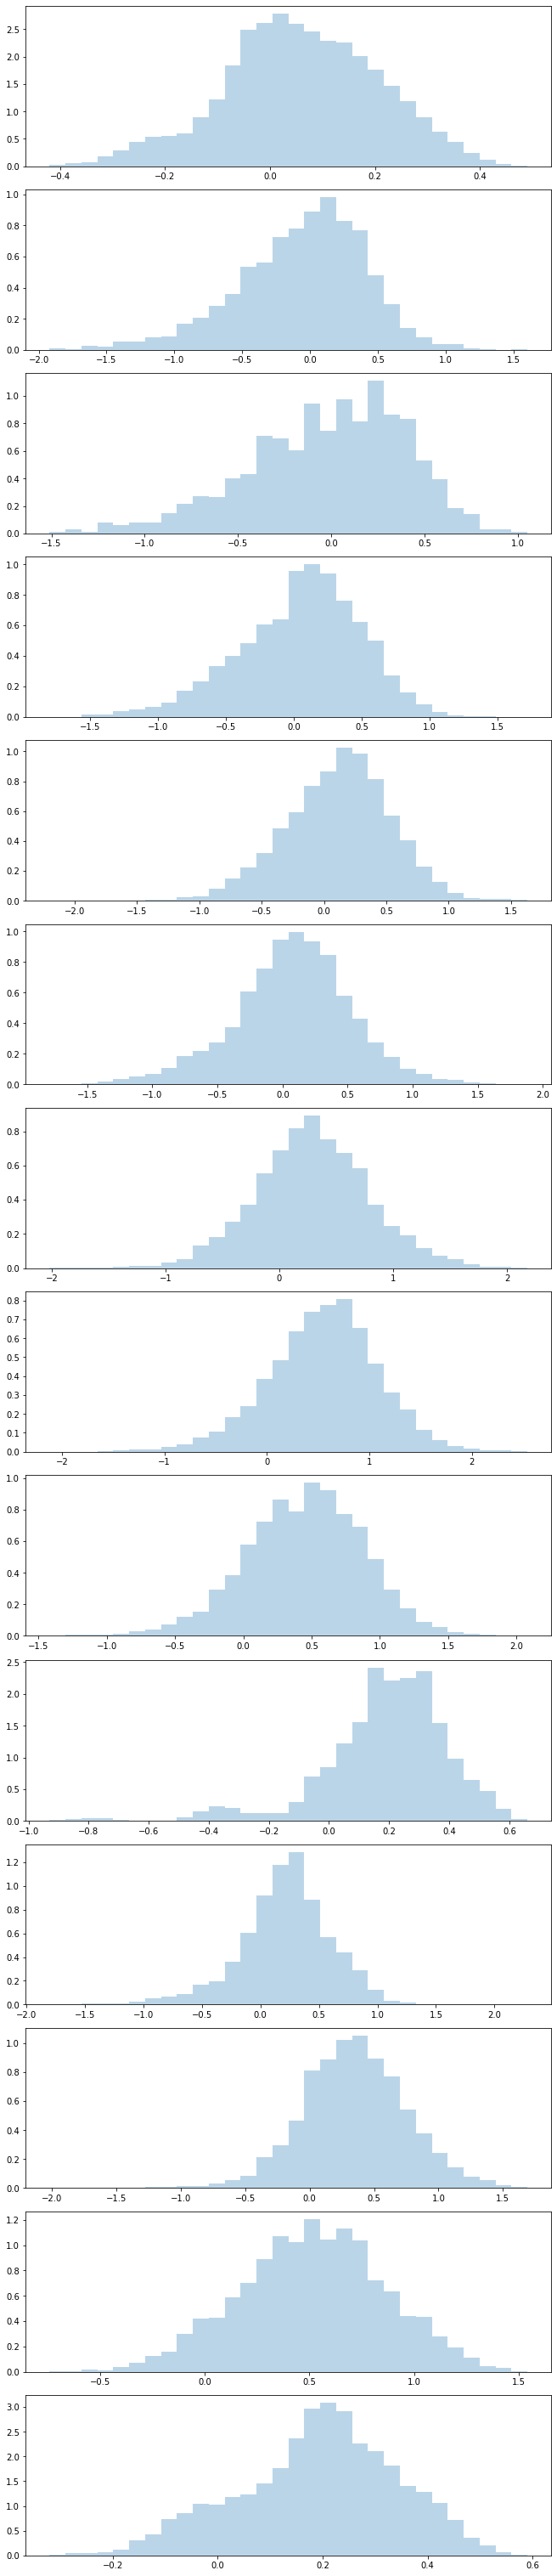

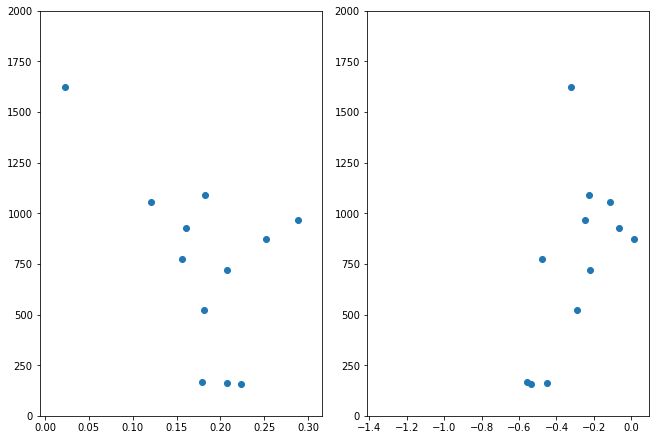

In [64]:
def vertical_wind_analysis(IOP_stamp,RF_stamp):
    RF_AIMMS,RF_FCDP,RF_AAFCCN,RF_AOSCCN, RF_hlegs,RF_vlegs = ACEENA_load_saved_data(IOP_stamp,RF_stamp)
    save_path = "./"+IOP_stamp+"-"+RF_stamp+"/"
    import scipy.stats as stats
    N=RF_hlegs.hleg_dis.size
    hleg_w_var = []
    hleg_w_skew = []
    hle_w_alt = []
    fig,ax=plt.subplots(N,1,figsize=[9,3*N], constrained_layout=True)
    for i in range(N):
        if RF_hlegs.hleg_CF[i] > -10.0:  
            s,e=RF_AIMMS.hleg_s_idx[i],RF_AIMMS.hleg_e_idx[i]
            ax[i].hist(RF_AIMMS.w_w[s:e],bins=30,density=True,alpha=0.3)

            hleg_w_var.append(np.var(RF_AIMMS.w_w[s:e]).magnitude)
            hleg_w_skew.append(stats.skew(RF_AIMMS.w_w[s:e]))
            hle_w_alt.append(RF_AIMMS.Alt[s:e].mean().magnitude)
    
    fig,ax=plt.subplots(1,2,figsize=[9,6], constrained_layout=True)
    ax[0].scatter(hleg_w_var,hle_w_alt)
    ax[0].set_ylim([0,2000])
    ax[1].scatter(hleg_w_skew,hle_w_alt)
    ax[1].set_ylim([0,2000])
        
        
    
    
vertical_wind_analysis('IOP1','20170718083145')      

In [40]:
RF_AIMMS.hleg_Alt_mean

array([2477.04169954,  156.80888405,  167.27735849,  163.3107181 ,
        523.18001276,  719.61856003,  873.89661403,  966.62973749,
       1088.91154012, 2510.33723342,  773.32324654,  926.83440299,
       1057.77041563, 1625.07608919]) <Unit('meter')>